# Machine Learning 2 - Classification and Applications

In this lab we will learn how to generate synthetic data and how to apply various built-in classifiers to classify the data. The goal of this lab is to introduce you to a subset of classifcation methods and which methods perform better depending on the structure of the data. We will also see where data visulaization and background information can come in handy!

In [1]:
# Import base libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Python's scikit-learn (or sklearn) is a Machine Learning library equipped with simple and efficient tools for data mining and data analysis. In general, a learning problem consists of a set of $n$ samples of data and then tries to predict properties of _unknown_ data.

If each sample is **more** than a single number (aka multivariate), it is said to have several attributes or **features**. 

We will mainly focus on **supervised** learning, in which each input data has an associated label. If we have time, we will discuss unsupervised learning and what techniques are commonly used today.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_classes = 2, n_samples = 100, \
                           n_features = 2, n_redundant = 0, \
                           random_state = 1, n_clusters_per_class = 1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape) # add some noise to the data
linearly_separable = (X, y)

*make_classification* generates a random classification problem where the number of class is user-specified. Later we will see *make_moons* and *make_circles*.

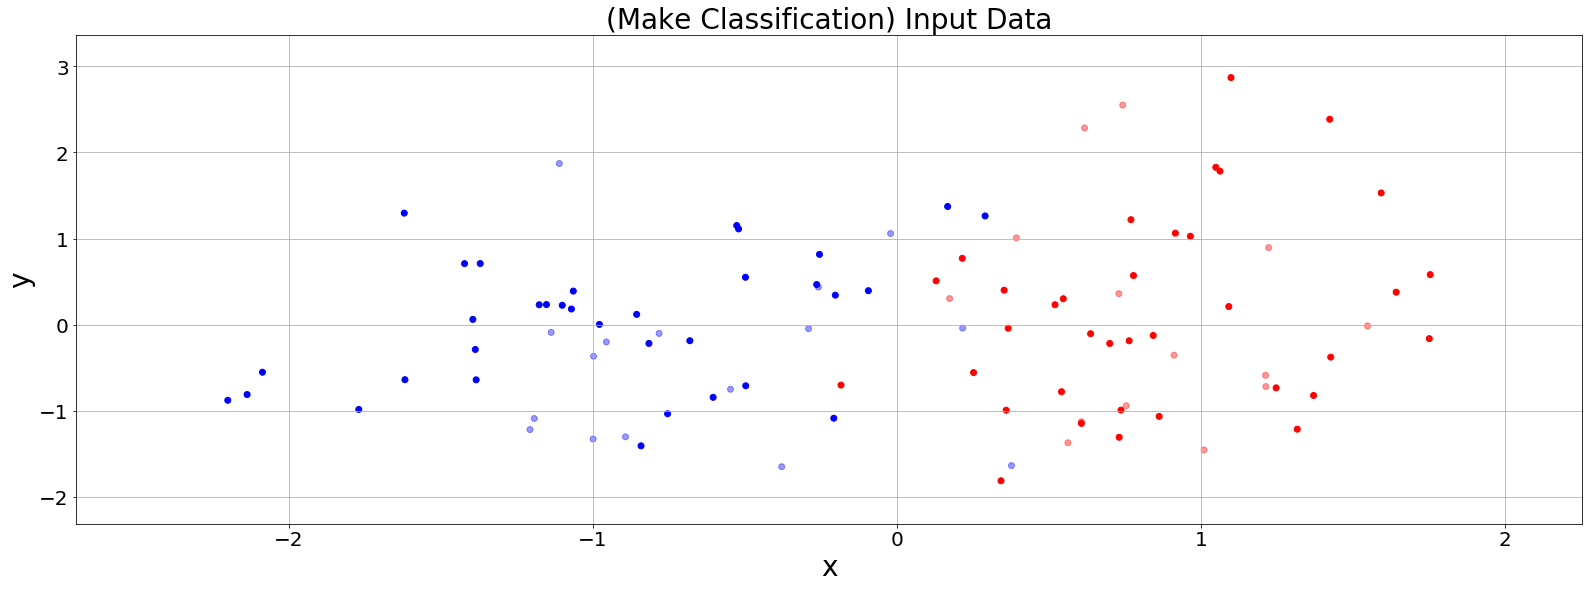

In [3]:
figure = plt.figure( figsize=(27,9) )
color_map = plt.cm.RdBu #Red-Blue colormap
cm_bright = ListedColormap(['#FF0000','#0000FF'])

X = StandardScaler().fit_transform(X)# center and scale the data

# Split the data to reserve some for model validation
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=42)
    
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # for plotting
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # y-axis, not to be confused with y labels

# Don't worry about the mesh grid now, we will use it to make pretty plots!
h = 0.02 # the mesh step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.title("(Make Classification) Input Data", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()

# $K$-Nearest Neighbors

The first classifier we are going to consider is $k$-nearest neighbors. The idea behind the method is that the input consists of the $k$ closest training examples in the feature space. An object is classified by a **majority vote** of its neighbors, with the object being assignmed to the class most common among its **_k_** nearest neighbors, hence the name.

**Activity! Get up!**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

names = ["Nearest Neighbors"]
#cl = [KNeighborsClassifier(3,weights = 'distance')] # Let's choose k=3
cl = [KNeighborsClassifier(3)] # Let's choose k=3

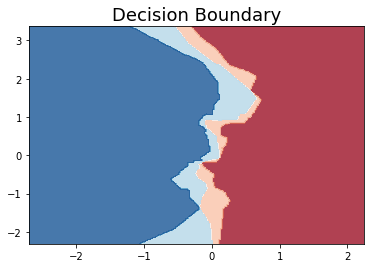

In [5]:
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

# Plot the decision boundary for which we will assign a color to each class
# concatonate vectorized grid and compute probability estimates for the data

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
#Z = cl[0].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.title('Decision Boundary', fontsize = 18)

plt.show()
plt.close()

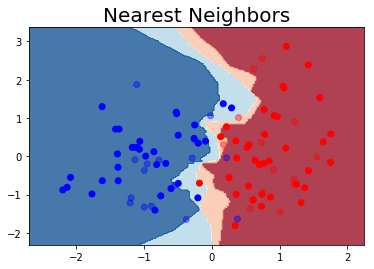

In [6]:
# Adding the data...
plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
plt.title(names[0], fontsize = 20)

plt.show()
plt.close()

In [7]:
#np.set_printoptions(threshold='nan')
#cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
print(score) 

0.9


Not bad! We see that the $k$-nearest neighbors algorithm was able to classify the unseen data with an accuracy of 90%!

# Decision Tree

Next, we will take a look at Decision Tree Classification. A decision tree is a flowchart-like structure in which each internal **node** represents a "test" on an attribute (or feature), each **branch** represents the outcome of the test, and each **leaf** node represents a class label. 


In [8]:
from IPython.display import Image
Image(url='https://image.slidesharecdn.com/decisiontree-151015165353-lva1-app6892/95/classification-using-decision-tree-12-638.jpg?cb=1444928106')

In [9]:
Image(url='http://help.prognoz.com/en/mergedProjects/Lib/img/decisiontree.gif')

In [10]:
from sklearn.tree import DecisionTreeClassifier

names.append("Decision Tree")
cl.append(DecisionTreeClassifier(max_depth=5))

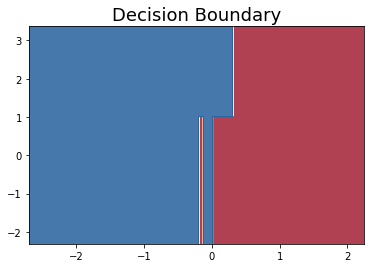

In [11]:
cl[1].fit(X_train,y_train)
score = cl[1].score(X_test,y_test)

# Plot the decision boundary for which we will assign a color to each class
# concatonate vectorized grid and compute probability estimates for the data

#Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
Z = cl[1].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.title('Decision Boundary', fontsize = 18)

plt.show()
plt.close()

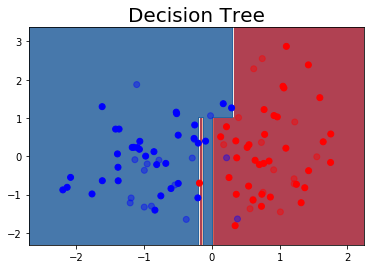

In [12]:
# Adding the data...
plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
plt.title(names[1], fontsize = 20)

plt.show()
plt.close()

In [13]:
print(score) 

0.9333333333333333


Even better! A Decision Tree Classifier was able to predict the unseen data labels with an accuracy of over 93%!

# Different Structured Data

Now let's take a look at how these algorithms perform on data with different structural relationships. As you may think, sklearn's *make_moons* can artificial generate data whose class labeling's form "moons" around each other. Similarily, *make_circles* generates data grouped with circular structure. 

The cells below provide a visual of the what these functions output.

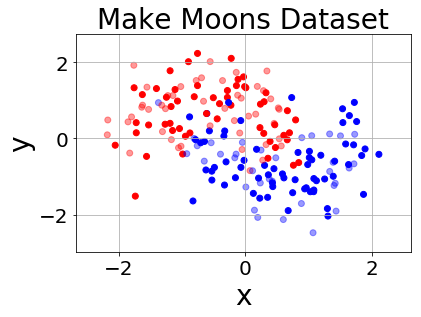

In [14]:
X, y = make_moons(noise = 0.3, random_state = 0, n_samples = 200)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.4, random_state = 42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.title("Make Moons Dataset", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()


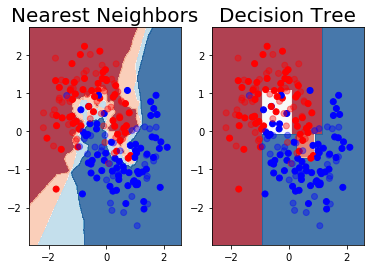

Nearest Neighbors Score: 0.8625
Decision Tree Score: 0.825


In [15]:
ax = plt.subplot(1,2,1)

# Fit make_moons dataset with k-Nearest Neighbors Classifier
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax.set_title(names[0], fontsize = 20)

# Fit make_circles dataset with Decision Tree Classifier
ax2 = plt.subplot(1,2,2)
cl[1].fit(X_train,y_train)
score2 = cl[1].score(X_test,y_test)

Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax2.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax2.set_title(names[1], fontsize = 20)

plt.show()
plt.close()

print("Nearest Neighbors Score:",score)
print("Decision Tree Score:",score2)

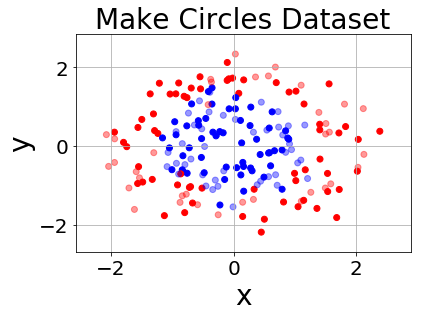

In [16]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1,n_samples = 200)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.4, random_state = 42)
    
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.title("Make Circles Dataset", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()


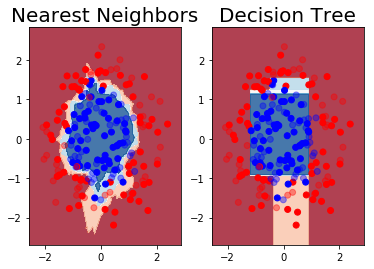

Nearest Neighbors Score: 0.875
Decision Tree Score: 0.8375


In [17]:
ax = plt.subplot(1,2,1)

# Fit make_circles dataset with k-Nearest Neighbors Classifier
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax.set_title(names[0], fontsize = 20)

# Fit make_circles dataset with Decision Tree Classifier
ax2 = plt.subplot(1,2,2)
cl[1].fit(X_train,y_train)
score2 = cl[1].score(X_test,y_test)

Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax2.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax2.set_title(names[1], fontsize = 20)

plt.show()
plt.close()

print("Nearest Neighbors Score:",score)
print("Decision Tree Score:",score2)

# Color Quantization Using K-Means

In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline


In this example we'll look at color quantization. This is a way to reduce the storage space of an image by cutting down on how many colors are used. Instead of storing a color for each pixel, you can store a reference to a dictionary containing the colors. The following code sets up the example. 

In [19]:
# Color Quantization Example
#
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

class ColorQuant():
    
    def _generate_random_codebook(self, n_colors):
        """ Generate a codebook and labels for the image using nearest neighbors on n_colors pixels
        chosen at random from the image."""
        codebook_random = shuffle(self.image_array, random_state=self.random_state)[:n_colors + 1]
        labels_random = pairwise_distances_argmin(codebook_random,
                                          self.image_array,
                                          axis=0)
        return [codebook_random, labels_random]
    
    def _generate_kmeans_codebook(self, n_colors):
        """ Generate a codebook and labels for the image using nearest kmeans with n_colors
        clusters."""
        kmeans = KMeans(n_clusters=n_colors, random_state=self.random_state).fit(self.image_array_sample)

        labels_kmeans = kmeans.predict(self.image_array)
        
        codebook_kmeans = kmeans.cluster_centers_
        return [codebook_kmeans, labels_kmeans]
    
    def _recreate_image(self, codebook, labels):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((self.w, self.h, d))
        label_idx = 0
        for i in range(self.w):
            for j in range(self.h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    
    def _compress_randomly(self, n_colors):
        """ Compress the image using randomly selected colors from the image pixels. """
        codebook_random, labels_random = self._generate_random_codebook(n_colors)
        image_random = self._recreate_image(codebook_random, labels_random)
        return image_random
    
    def _compress_using_kmeans(self, n_colors):
        """ Compress the image using kmeans-selected colors. """
        codebook_kmeans, labels_kmeans = self._generate_kmeans_codebook(n_colors)
        image_kmeans = self._recreate_image(codebook_kmeans, labels_kmeans)
        return image_kmeans
    
    def compress(self, n_colors=64):
        """ Compress the image into n_colors using both random and kmeans color selection. Plot both
        compressed images and the original. """
        
        image_kmeans = self._compress_using_kmeans(n_colors)
        image_random = self._compress_randomly(n_colors)
        
        plt.figure(1)
        plt.clf()
        ax = plt.axes([0, 0, 1, 1])
        plt.axis('off')
        plt.title('Original image (96,615 colors)')
        plt.imshow(self.image_original)

        plt.figure(2)
        plt.clf()
        ax = plt.axes([0, 0, 1, 1])
        plt.axis('off')
        plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
        plt.imshow(image_kmeans)

        plt.figure(3)
        plt.clf()
        ax = plt.axes([0, 0, 1, 1])
        plt.axis('off')
        plt.title('Quantized image ({} colors, Random)'.format(n_colors))
        plt.imshow(image_random)
        plt.show()
        
    def show_image(self, image):
        plt.figure(1)
        plt.clf()
        ax = plt.axes([0, 0, 1, 1])
        plt.axis('off')
        plt.imshow(image)
    
    def __init__(self, random_state = 0):
        
        self.random_state = random_state
        
        # Load the Summer Palace photo
        image_original = load_sample_image("china.jpg")

        # Convert to floats instead of the default 8 bits integer coding
        image_original = np.array(image_original, dtype=np.float64) / 255

        # Transform to a 2D numpy array and sample at random for KMeans
        w, h, d = original_shape = tuple(image_original.shape)
        image_array = np.reshape(image_original, (w * h, d))
        image_array_sample = shuffle(image_array, random_state=0)[:1000]
        
        # Assign attributes
        self.image_array_sample = image_array_sample
        self.image_original = image_original
        self.image_array = image_array
        self.w = w
        self.h = h


Let's take a look at how it works. First let's see the original photo. 

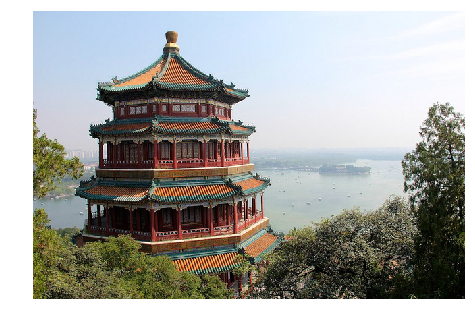

In [20]:
example_CQ = ColorQuant()
example_CQ.show_image(example_CQ.image_original)

Now let's try compressing it. There are a lot of unique colors in the original image (almost 10,000). Suppose we wanted to use only 64? How should we choose them? Probably the simplest thing to do would be to pick 64 colors from the picture at random, and then assign to each pixel whichever of these 64 is the closest to the original color. We can do better than that, though, by using some of the clustering techniques we looked at earlier.

Look at the sky in this photo - I see a gradient of pretty similar colors. It would be good if we could make sure we got at least one representative blue hue in our set of 64, maybe even 2 or 3. If we could find the mean of the blue, that might make a good choice. We can use KMeans to try to find this. The following line picks 64 colors at random and compares the result to doing KMeans on 64 clusters, using each pixel as a data point. 

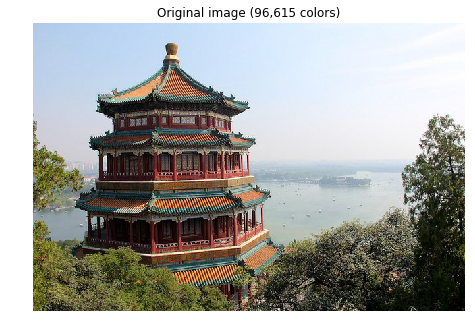

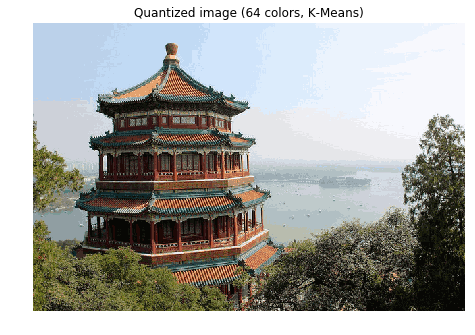

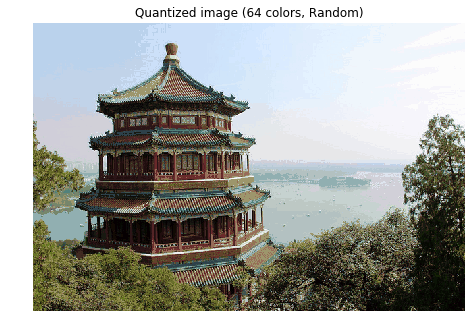

In [21]:
example_CQ.compress(64)

As we expected, the KMeans version looks better. Try running it again with a different number of colors. What's the minimum you need before it starts to look really bad? What about the minimum so that you can't tell the difference between the compressed and original image?

In [22]:
#example_CQ.compress(whatever_number_you_want_goes_here)

# Comparison of Different Classification Algorithms

So far we've worked with a few of the simpler classification algorithms. In this example we'll look at how these and several others compare accross a variety of toy datasets. The code below might take a while to run - it will generate some plots so you can see the differences between various methods. 

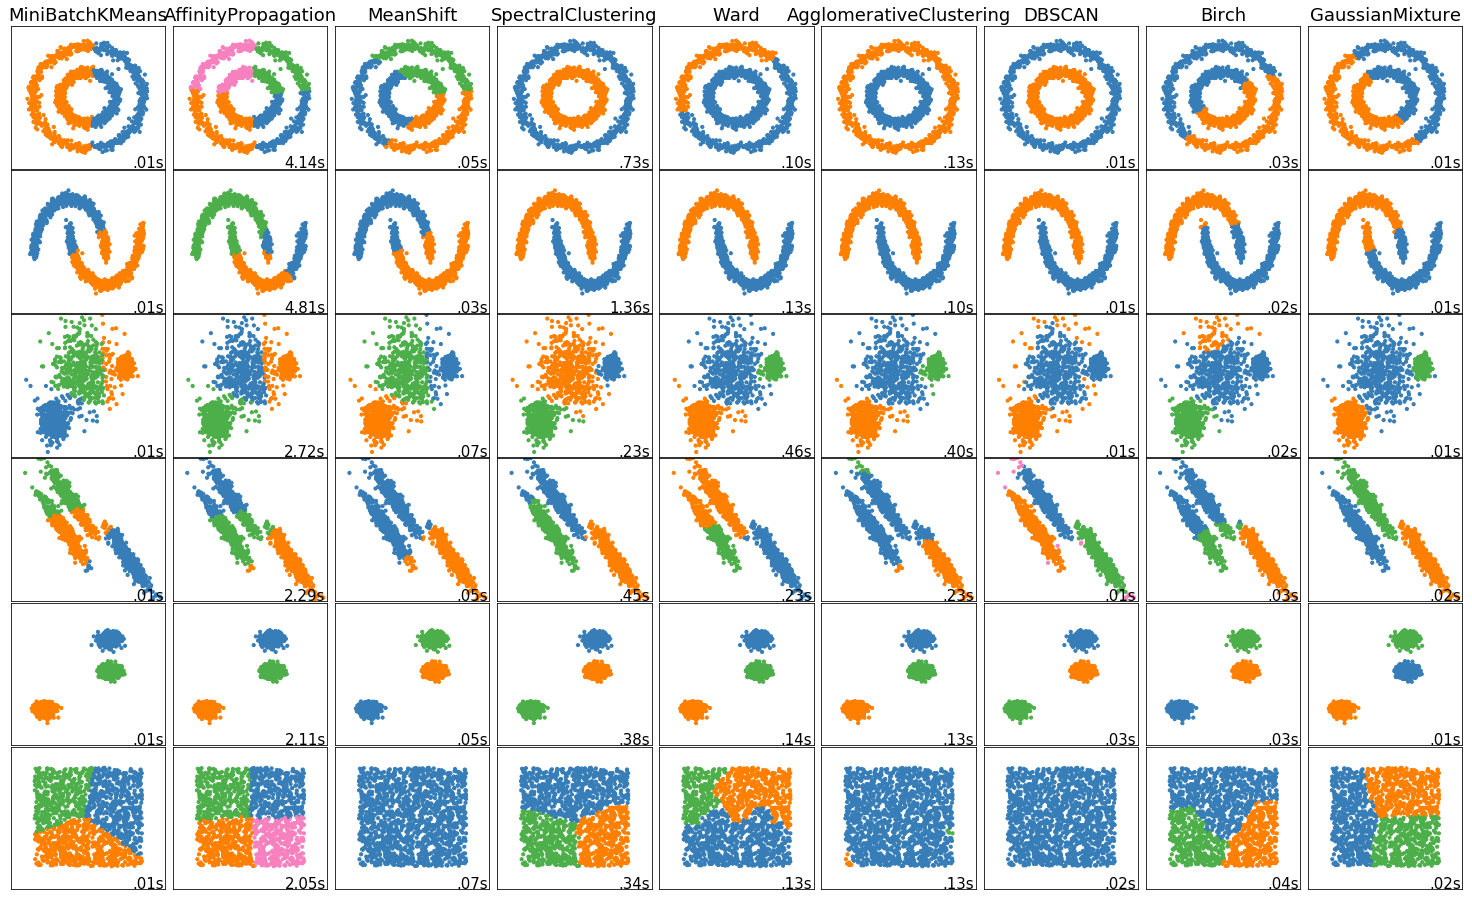

In [23]:
# this example from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Object Detection

For the last part of this lab, open up the `object_detection` notebook (in the self-named directory), and follow along there. 